In [6]:
import yfinance as yf
from datetime import date,timedelta
from pycaret import time_series as ts
from pycaret.time_series import TSForecastingExperiment
import plotly.express as px
import warnings
import pandas as pd

In [7]:
warnings.filterwarnings('ignore')

In [8]:
yday = date.today() - timedelta(days=1)
startday = yday - timedelta(days=729)

In [9]:
stock_name = ["AKBNK.IS"]

In [10]:
akbnk_data = yf.download(tickers = stock_name[0], start = startday, end = yday )
df = akbnk_data.copy()

[*********************100%***********************]  1 of 1 completed


In [33]:
akbnk_data.reset_index(inplace=True)
akbnk_data['MA30'] = akbnk_data['Close'].rolling(30).mean()

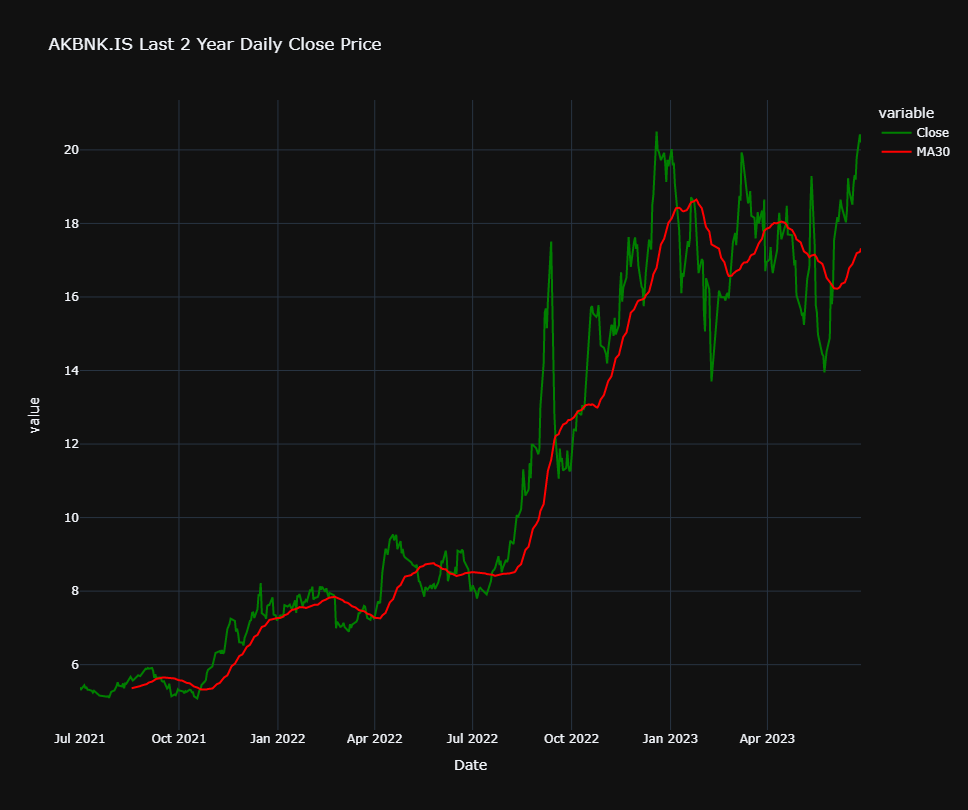

In [34]:
akbnk_price_chart = px.line(akbnk_data,
                           x='Date',
                           y=['Close','MA30'],
                           title=f'{stock_name[0]} Last 2 Year Daily Close Price', 
                           template = 'plotly_dark',
                           color_discrete_map={'Close':'green', 'MA30':'red'}, 
                           width=800, height=800)
akbnk_price_chart.show()

In [82]:
dft = df.copy()

In [95]:
df=dft.copy()

In [43]:
start_date = df.index.min()
end_date = df.index.max()
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
complete_df = pd.DataFrame(index=date_range)
# Merge the original DataFrame with the complete DataFrame
merged_df = complete_df.merge(df, left_index=True, right_index=True, how='left')
# Perform linear interpolation to fill missing values
# Maybe time, quadratic or from_derivatives
filled_df = merged_df.interpolate(method='linear')
fig_kwargs={'renderer': 'notebook'}
forecast_horizon = 60
fold = 3
exp = TSForecastingExperiment()
exp.setup(data=filled_df['Close'], fh=forecast_horizon, fold=fold, fig_kwargs=fig_kwargs, session_id=123)
top_model = exp.compare_models(sort='mape')

,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(727, 1)"
5,Transformed data shape,"(727, 1)"
6,Transformed train set shape,"(667, 1)"
7,Transformed test set shape,"(60, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,5.5572,3.8426,1.2675,1.5689,0.0730,0.0732,-0.4824,0.2733
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,7.0596,4.7690,1.5938,1.9333,0.0927,0.0923,-1.0564,0.2633
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,7.8959,5.3563,1.7836,2.1738,0.1005,0.1069,-1.6420,0.2433
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,8.0346,5.5312,1.8256,2.2522,0.1064,0.1043,-1.9390,0.5900
catboost_cds_dt,CatBoost Regressor w/ Cond. Deseasonalize & Detrending,7.9078,5.2736,1.8105,2.1514,0.1075,0.1014,-1.8843,0.9467
snaive,Seasonal Naive Forecaster,8.7099,5.7778,1.9556,2.3354,0.1136,0.1138,-1.9204,0.8700
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,8.3208,5.5209,1.9089,2.2550,0.1136,0.1061,-2.2628,0.4000
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,8.6362,5.6880,1.9516,2.3042,0.1146,0.1115,-1.9537,0.2867
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,8.6201,5.7308,1.9556,2.3261,0.1152,0.1106,-2.1065,0.5967
naive,Naive Forecaster,8.9097,5.8604,1.9953,2.3622,0.1164,0.1155,-1.9526,1.1700


In [44]:
exp.predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,XGBRegressor,4.8601,3.4122,1.3702,1.6025,0.0831,0.0808,0.2371


,y_pred
2023-04-29,16.0782
2023-04-30,16.4973
2023-05-01,16.6886
2023-05-02,16.8068
2023-05-03,16.6848
2023-05-04,16.7497
2023-05-05,16.7503
2023-05-06,16.7975
2023-05-07,16.7957
2023-05-08,16.8427


In [47]:
final_best = exp.finalize_model(best)
exp.save_model(final_best, "best_model_raw")

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ForecastingPipeline(steps=[('forecaster',
                                                                                             TransformedTargetForecaster(steps=[('model',
                                                                                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [2,
                                                                                                                                                                                                         1]},
                                                                                                                                                                                    n_jobs=1)],
                                    

In [48]:
loaded_exp = TSForecastingExperiment()
loaded_model = loaded_exp.load_model("best_model_raw")
loaded_exp.predict_model(loaded_model, fh = 30)

Transformation Pipeline and Model Successfully Loaded


,y_pred
2023-06-28,20.1274
2023-06-29,20.3382
2023-06-30,20.4406
2023-07-01,20.4538
2023-07-02,20.4053
2023-07-03,20.4127
2023-07-04,20.3818
2023-07-05,20.4004
2023-07-06,20.3662
2023-07-07,20.4398
